I found a simple trick to improve the quality of generated random images from DCGAN.
Using a trained generator network, generate random images and then pass them through the discriminator network.
From the generated images only take the images for which the discriminator had a large score of being "real" image

For example, I trained DCGAN on [acroyoga](https://www.instagram.com/explore/tags/acroyoga/) images. I modified the original [dcgan faces code](https://github.com/Newmu/dcgan_code/tree/master/faces) a little bit and add a second task which I trained in parallel to the GAN task. The second task was to predict the ["likes"](http://karpathy.github.io/2015/10/25/selfie/) that each picture will generate. I then only took generated images that had a high discriminator score (i.e. the discriminator network thought they are real) and high "likes" score (I only wanted to generate pictures that people will like :-)

In the process of training I found that performing both GAN and classification task simultaneously helped to regulrize the network and I did not saw the typical divergence of training and validation costs as the iteration progressed. However, the idea of filtering the generated images also worked well for network which were only trained for GAN.

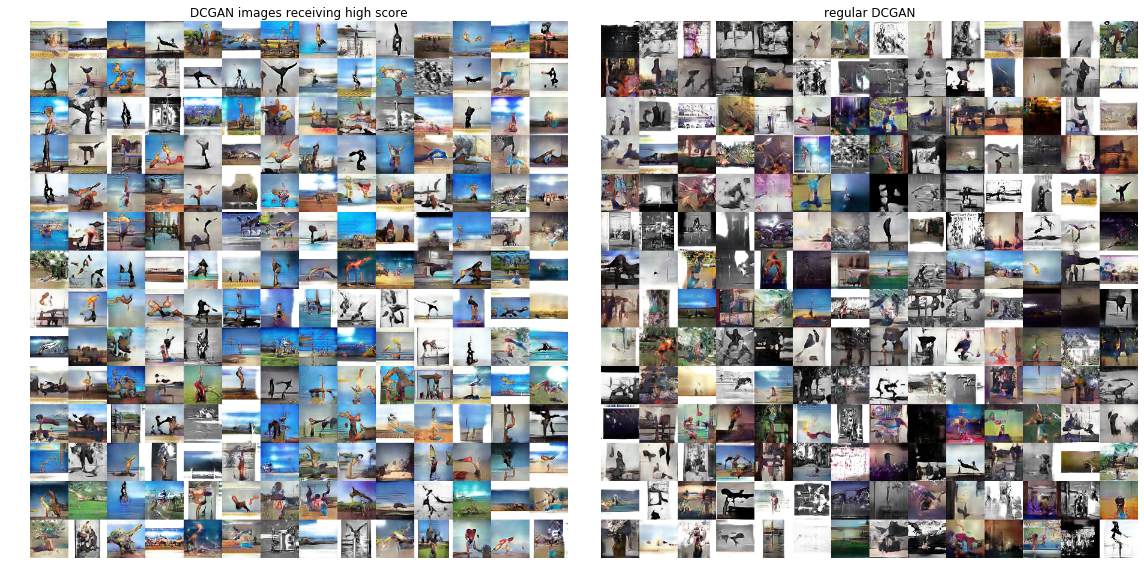

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
plt.figure(figsize=(16,16))
plt.subplot(121)
plt.axis('off')
plt.imshow(imread('samples/test/Z_000.png'))
plt.title('DCGAN images receiving high score')
plt.subplot(122)
plt.axis('off')
plt.imshow(imread('samples/test1/Z_000.png'))
plt.title('regular DCGAN')
plt.gcf().tight_layout()

you can download my trained model

In [1]:
!mkdir -p models/classify/
!aws s3 sync s3://udibr/dcgan_code/acro/models/classify/ models/classify/

download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_01.npy to models/classify/2_discrim_params.jl_01.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_04.npy to models/classify/2_discrim_params.jl_04.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_02.npy to models/classify/2_discrim_params.jl_02.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl to models/classify/2_discrim_params.jl
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_03.npy to models/classify/2_discrim_params.jl_03.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_06.npy to models/classify/2_discrim_params.jl_06.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_08.npy to models/classify/2_discrim_params.jl_08.npy
download: s3://udibr/dcgan_code/acro/models/classify/2_discrim_params.jl_09.npy to models/classify/2_discrim_params.jl_09.npy
downlo

and generate filtered images

In [4]:
!python train_uncond_dcgan.py --generate --generate_d 0.26 --generate_c 0.61 --db1 --dbn --batch 128 -z 200 --znorm --classify --desc test --model models/classify/2

Using gpu device 0: GRID K520 (CNMeM is disabled)
loading models/classify/2
loading old format 13 10
 97%|███████████████████████████████████████▉ | 191/196 [00:36<00:00,  5.98it/s]generate_d 0.162423 0.111868 generate_c 0.539213 0.0755135


or unfiltered images

In [10]:
!python train_uncond_dcgan.py --generate --db1 --dbn --batch 128 -z 200 --znorm --classify --desc test1 --model models/classify/2

Using gpu device 0: GRID K520 (CNMeM is disabled)
loading models/classify/2
loading old format 13 10
 65%|██████████████████████████▊              | 128/196 [00:01<00:00, 74.43it/s]generate_d 0.148615 0.0876223 generate_c 0.536646 0.0748703
